# Use a simple Neural Network (fully connected)

## Libraries

In [1]:
from modules.data_exploration.data_ex import import_data, gen_bulk_data, get_bulk_inst

from modules.build_ml_models.NN_classification import build_model, plot_learning_curves_opt, plot_learning_loss

from modules.build_ml_models.NN_classification import plot_confusion_matrix, print_classification_report


## Load data

In [2]:
file_path = 'data/churn.csv'
data_dict = gen_bulk_data(file_path)
data_dict.keys()

dict_keys(['original', 'dropped', 'scaled', 'encoded', 'encoded and scaled', 'scaled and dropped'])

In [3]:
key = 'original'

x_train, x_test, x_val, y_train, y_test, y_val = get_bulk_inst(data_dict, key)

In [4]:
x_train

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,31,160,415,4592,0,0,0,118.9,106,20.21,163.5,75,13.90,195.0,131,8.78,13.1,4,3.54,0
1,20,133,415,1867,0,0,0,173.1,126,29.43,200.0,98,17.00,231.0,103,10.40,10.8,1,2.92,1
2,5,90,408,3456,0,1,30,183.8,76,31.25,229.7,95,19.52,144.1,124,6.48,7.7,3,2.08,1
3,17,73,510,2603,0,0,0,234.7,102,39.90,195.7,110,16.63,253.4,71,11.40,8.4,8,2.27,2
4,32,53,415,4809,0,0,0,143.8,102,24.45,199.6,124,16.97,177.8,65,8.00,7.8,4,2.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,9,120,415,1079,0,1,31,153.5,83,26.10,219.1,96,18.62,237.4,76,10.68,11.4,4,3.08,0
3496,40,105,408,470,1,0,0,274.0,156,46.58,263.0,69,22.36,195.9,93,8.82,11.3,3,3.05,3
3497,3,76,408,4504,0,1,12,98.4,100,16.73,187.5,119,15.94,177.0,68,7.97,15.1,3,4.08,1
3498,13,55,510,203,0,1,8,222.5,104,37.83,171.5,94,14.58,377.5,114,16.99,9.7,2,2.62,1


In [5]:
print('X_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('X_train type:', type(x_train))
print('y_train type:', type(y_train))


X_train shape: (3500, 20)
y_train shape: (3500,)
X_train type: <class 'pandas.core.frame.DataFrame'>
y_train type: <class 'pandas.core.series.Series'>


## Build simple model

In [6]:
from tensorflow.keras.optimizers import Adam

optimizer= Adam(0.005)

In [7]:
model = build_model(input_shape=20, hidden_shapes=[32], hidden_activation='relu',
                    opt=optimizer, dropout=0.0, loss='binary_crossentropy')

In [8]:
model.summary()

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 20)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 32)                672       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


## Fit simple model

In [9]:
epo = 1000

history = model.fit(x_train, y_train, epochs=epo, validation_data=(x_val, y_val), verbose=1)

Epoch 1/1000
110/110 [==============================] - 0s 4ms/step - loss: 3.9145 - accuracy: 0.7789 - precision: 0.2063 - recall: 0.1980 - val_loss: 2.0626 - val_accuracy: 0.8587 - val_precision: 0.5000 - val_recall: 0.1038
Epoch 2/1000
110/110 [==============================] - 0s 2ms/step - loss: 2.3829 - accuracy: 0.7791 - precision: 0.2163 - recall: 0.2141 - val_loss: 3.3261 - val_accuracy: 0.8600 - val_precision: 0.6667 - val_recall: 0.0189
Epoch 3/1000
110/110 [==============================] - 0s 2ms/step - loss: 3.5995 - accuracy: 0.7697 - precision: 0.1909 - recall: 0.1939 - val_loss: 1.0469 - val_accuracy: 0.7213 - val_precision: 0.2711 - val_recall: 0.5755
Epoch 4/1000
110/110 [==============================] - 0s 2ms/step - loss: 1.6576 - accuracy: 0.7966 - precision: 0.2725 - recall: 0.2626 - val_loss: 1.4268 - val_accuracy: 0.8520 - val_precision: 0.4138 - val_recall: 0.1132
Epoch 5/1000
110/110 [==============================] - 0s 2ms/step - loss: 2.6085 - accuracy: 0

110/110 [==============================] - 0s 2ms/step - loss: 0.8312 - accuracy: 0.8280 - precision: 0.3819 - recall: 0.3495 - val_loss: 5.8477 - val_accuracy: 0.2373 - val_precision: 0.1522 - val_recall: 0.9623
Epoch 38/1000
110/110 [==============================] - 0s 2ms/step - loss: 1.5025 - accuracy: 0.8100 - precision: 0.3272 - recall: 0.3253 - val_loss: 1.4037 - val_accuracy: 0.6280 - val_precision: 0.2577 - val_recall: 0.8679
Epoch 39/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.8712 - accuracy: 0.8203 - precision: 0.3586 - recall: 0.3434 - val_loss: 0.5900 - val_accuracy: 0.8613 - val_precision: 0.5143 - val_recall: 0.3396
Epoch 40/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.8537 - accuracy: 0.8286 - precision: 0.3890 - recall: 0.3717 - val_loss: 0.7234 - val_accuracy: 0.8787 - val_precision: 0.7419 - val_recall: 0.2170
Epoch 41/1000
110/110 [==============================] - 0s 2ms/step - loss: 1.0149 - accuracy: 0.8260 - p

110/110 [==============================] - 0s 2ms/step - loss: 0.7630 - accuracy: 0.8346 - precision: 0.4075 - recall: 0.3737 - val_loss: 0.6030 - val_accuracy: 0.8813 - val_precision: 0.7429 - val_recall: 0.2453
Epoch 74/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.7217 - accuracy: 0.8560 - precision: 0.4898 - recall: 0.4364 - val_loss: 1.8971 - val_accuracy: 0.8720 - val_precision: 0.7500 - val_recall: 0.1415
Epoch 75/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.5794 - accuracy: 0.8523 - precision: 0.4761 - recall: 0.4424 - val_loss: 0.4238 - val_accuracy: 0.8880 - val_precision: 0.7200 - val_recall: 0.3396
Epoch 76/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.8506 - precision: 0.4686 - recall: 0.4222 - val_loss: 0.6675 - val_accuracy: 0.8800 - val_precision: 0.7222 - val_recall: 0.2453
Epoch 77/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.9995 - accuracy: 0.8274 - p

110/110 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.8560 - precision: 0.4874 - recall: 0.3515 - val_loss: 0.3653 - val_accuracy: 0.8867 - val_precision: 0.7692 - val_recall: 0.2830
Epoch 110/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.8786 - precision: 0.5978 - recall: 0.4323 - val_loss: 0.5208 - val_accuracy: 0.8800 - val_precision: 0.8333 - val_recall: 0.1887
Epoch 111/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8683 - precision: 0.5462 - recall: 0.4061 - val_loss: 0.3599 - val_accuracy: 0.8760 - val_precision: 0.7097 - val_recall: 0.2075
Epoch 112/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8640 - precision: 0.5269 - recall: 0.3758 - val_loss: 0.4751 - val_accuracy: 0.8747 - val_precision: 0.7727 - val_recall: 0.1604
Epoch 113/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.8520

Epoch 145/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8817 - precision: 0.6364 - recall: 0.3818 - val_loss: 0.2824 - val_accuracy: 0.8920 - val_precision: 0.6866 - val_recall: 0.4340
Epoch 146/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.8786 - precision: 0.6287 - recall: 0.3455 - val_loss: 0.2796 - val_accuracy: 0.8853 - val_precision: 0.6923 - val_recall: 0.3396
Epoch 147/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8854 - precision: 0.6643 - recall: 0.3838 - val_loss: 0.3237 - val_accuracy: 0.8760 - val_precision: 0.5970 - val_recall: 0.3774
Epoch 148/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8783 - precision: 0.6264 - recall: 0.3455 - val_loss: 0.3460 - val_accuracy: 0.8693 - val_precision: 0.5370 - val_recall: 0.5472
Epoch 149/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2919 - a

Epoch 181/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2865 - accuracy: 0.8914 - precision: 0.7291 - recall: 0.3697 - val_loss: 0.3201 - val_accuracy: 0.8867 - val_precision: 0.9200 - val_recall: 0.2170
Epoch 182/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2913 - accuracy: 0.8906 - precision: 0.7105 - recall: 0.3818 - val_loss: 0.3204 - val_accuracy: 0.8827 - val_precision: 0.6452 - val_recall: 0.3774
Epoch 183/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2767 - accuracy: 0.8980 - precision: 0.7447 - recall: 0.4242 - val_loss: 0.2847 - val_accuracy: 0.8907 - val_precision: 0.6667 - val_recall: 0.4528
Epoch 184/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2811 - accuracy: 0.8954 - precision: 0.7295 - recall: 0.4141 - val_loss: 0.2842 - val_accuracy: 0.8933 - val_precision: 0.7708 - val_recall: 0.3491
Epoch 185/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2817 - a

Epoch 217/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2746 - accuracy: 0.8991 - precision: 0.7432 - recall: 0.4384 - val_loss: 0.2900 - val_accuracy: 0.8933 - val_precision: 0.6711 - val_recall: 0.4811
Epoch 218/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.8897 - precision: 0.7041 - recall: 0.3798 - val_loss: 0.3059 - val_accuracy: 0.8947 - val_precision: 0.6286 - val_recall: 0.6226
Epoch 219/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2872 - accuracy: 0.8974 - precision: 0.7537 - recall: 0.4081 - val_loss: 0.2847 - val_accuracy: 0.8920 - val_precision: 0.8378 - val_recall: 0.2925
Epoch 220/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2741 - accuracy: 0.9029 - precision: 0.7818 - recall: 0.4343 - val_loss: 0.2838 - val_accuracy: 0.8920 - val_precision: 0.6866 - val_recall: 0.4340
Epoch 221/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2935 - a

Epoch 253/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2776 - accuracy: 0.8949 - precision: 0.7197 - recall: 0.4202 - val_loss: 0.2962 - val_accuracy: 0.8920 - val_precision: 0.8378 - val_recall: 0.2925
Epoch 254/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2770 - accuracy: 0.8974 - precision: 0.7329 - recall: 0.4323 - val_loss: 0.3350 - val_accuracy: 0.8800 - val_precision: 0.6379 - val_recall: 0.3491
Epoch 255/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2867 - accuracy: 0.8980 - precision: 0.7430 - recall: 0.4263 - val_loss: 0.3052 - val_accuracy: 0.8893 - val_precision: 0.9259 - val_recall: 0.2358
Epoch 256/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2794 - accuracy: 0.8937 - precision: 0.7321 - recall: 0.3919 - val_loss: 0.3093 - val_accuracy: 0.8853 - val_precision: 0.6190 - val_recall: 0.4906
Epoch 257/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2713 - a

Epoch 289/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2641 - accuracy: 0.9020 - precision: 0.7500 - recall: 0.4606 - val_loss: 0.2713 - val_accuracy: 0.9013 - val_precision: 0.7424 - val_recall: 0.4623
Epoch 290/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.8957 - precision: 0.7305 - recall: 0.4162 - val_loss: 0.3637 - val_accuracy: 0.8840 - val_precision: 0.6301 - val_recall: 0.4340
Epoch 291/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.8920 - precision: 0.7623 - recall: 0.3434 - val_loss: 0.2813 - val_accuracy: 0.8960 - val_precision: 0.6750 - val_recall: 0.5094
Epoch 292/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2908 - accuracy: 0.8926 - precision: 0.7228 - recall: 0.3899 - val_loss: 0.2783 - val_accuracy: 0.8987 - val_precision: 0.6974 - val_recall: 0.5000
Epoch 293/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2783 - a

Epoch 325/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2663 - accuracy: 0.9037 - precision: 0.7743 - recall: 0.4505 - val_loss: 0.3024 - val_accuracy: 0.8947 - val_precision: 0.6262 - val_recall: 0.6321
Epoch 326/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2874 - accuracy: 0.8946 - precision: 0.7128 - recall: 0.4263 - val_loss: 0.2721 - val_accuracy: 0.9000 - val_precision: 0.7246 - val_recall: 0.4717
Epoch 327/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2637 - accuracy: 0.9006 - precision: 0.7363 - recall: 0.4626 - val_loss: 0.2941 - val_accuracy: 0.8947 - val_precision: 0.6957 - val_recall: 0.4528
Epoch 328/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.8931 - precision: 0.7108 - recall: 0.4121 - val_loss: 0.2856 - val_accuracy: 0.8973 - val_precision: 0.6883 - val_recall: 0.5000
Epoch 329/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2764 - a

Epoch 361/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2632 - accuracy: 0.8994 - precision: 0.7299 - recall: 0.4586 - val_loss: 0.2712 - val_accuracy: 0.8960 - val_precision: 0.6842 - val_recall: 0.4906
Epoch 362/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2721 - accuracy: 0.8994 - precision: 0.7344 - recall: 0.4525 - val_loss: 0.2829 - val_accuracy: 0.8933 - val_precision: 0.7955 - val_recall: 0.3302
Epoch 363/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2706 - accuracy: 0.8983 - precision: 0.7294 - recall: 0.4465 - val_loss: 0.2721 - val_accuracy: 0.9000 - val_precision: 0.7183 - val_recall: 0.4811
Epoch 364/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2711 - accuracy: 0.8971 - precision: 0.7199 - recall: 0.4465 - val_loss: 0.2762 - val_accuracy: 0.8987 - val_precision: 0.7778 - val_recall: 0.3962
Epoch 365/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2631 - a

Epoch 397/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2660 - accuracy: 0.8989 - precision: 0.7296 - recall: 0.4525 - val_loss: 0.2832 - val_accuracy: 0.8987 - val_precision: 0.7419 - val_recall: 0.4340
Epoch 398/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2572 - accuracy: 0.9011 - precision: 0.7443 - recall: 0.4586 - val_loss: 0.3020 - val_accuracy: 0.8920 - val_precision: 0.8049 - val_recall: 0.3113
Epoch 399/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2676 - accuracy: 0.8983 - precision: 0.7372 - recall: 0.4364 - val_loss: 0.2797 - val_accuracy: 0.8973 - val_precision: 0.7736 - val_recall: 0.3868
Epoch 400/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2629 - accuracy: 0.8989 - precision: 0.7342 - recall: 0.4465 - val_loss: 0.2787 - val_accuracy: 0.8933 - val_precision: 0.7241 - val_recall: 0.3962
Epoch 401/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2725 - a

Epoch 433/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2815 - accuracy: 0.8934 - precision: 0.7148 - recall: 0.4101 - val_loss: 0.2930 - val_accuracy: 0.8933 - val_precision: 0.6444 - val_recall: 0.5472
Epoch 434/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2699 - accuracy: 0.8977 - precision: 0.7338 - recall: 0.4343 - val_loss: 0.2839 - val_accuracy: 0.8907 - val_precision: 0.6429 - val_recall: 0.5094
Epoch 435/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2696 - accuracy: 0.9006 - precision: 0.7458 - recall: 0.4505 - val_loss: 0.2997 - val_accuracy: 0.8880 - val_precision: 0.6250 - val_recall: 0.5189
Epoch 436/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2701 - accuracy: 0.9003 - precision: 0.7340 - recall: 0.4626 - val_loss: 0.2946 - val_accuracy: 0.8853 - val_precision: 0.7941 - val_recall: 0.2547
Epoch 437/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2740 - a

Epoch 469/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.9026 - precision: 0.7711 - recall: 0.4424 - val_loss: 0.2793 - val_accuracy: 0.8933 - val_precision: 0.6548 - val_recall: 0.5189
Epoch 470/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2713 - accuracy: 0.8989 - precision: 0.7196 - recall: 0.4667 - val_loss: 0.2799 - val_accuracy: 0.8893 - val_precision: 0.7447 - val_recall: 0.3302
Epoch 471/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2628 - accuracy: 0.9009 - precision: 0.7483 - recall: 0.4505 - val_loss: 0.2917 - val_accuracy: 0.8947 - val_precision: 0.6484 - val_recall: 0.5566
Epoch 472/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2715 - accuracy: 0.9011 - precision: 0.7411 - recall: 0.4626 - val_loss: 0.2883 - val_accuracy: 0.8987 - val_precision: 0.6744 - val_recall: 0.5472
Epoch 473/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2668 - a

Epoch 505/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2684 - accuracy: 0.8989 - precision: 0.7282 - recall: 0.4545 - val_loss: 0.3037 - val_accuracy: 0.8947 - val_precision: 0.6421 - val_recall: 0.5755
Epoch 506/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2676 - accuracy: 0.9003 - precision: 0.7386 - recall: 0.4566 - val_loss: 0.2837 - val_accuracy: 0.8960 - val_precision: 0.6556 - val_recall: 0.5566
Epoch 507/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2744 - accuracy: 0.8926 - precision: 0.6964 - recall: 0.4263 - val_loss: 0.2972 - val_accuracy: 0.8880 - val_precision: 0.8056 - val_recall: 0.2736
Epoch 508/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2670 - accuracy: 0.8986 - precision: 0.7333 - recall: 0.4444 - val_loss: 0.2824 - val_accuracy: 0.8960 - val_precision: 0.6667 - val_recall: 0.5283
Epoch 509/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2682 - a

Epoch 541/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2733 - accuracy: 0.8949 - precision: 0.7055 - recall: 0.4404 - val_loss: 0.3299 - val_accuracy: 0.8907 - val_precision: 0.7143 - val_recall: 0.3774
Epoch 542/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2680 - accuracy: 0.8994 - precision: 0.7299 - recall: 0.4586 - val_loss: 0.2883 - val_accuracy: 0.8960 - val_precision: 0.6628 - val_recall: 0.5377
Epoch 543/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2697 - accuracy: 0.9003 - precision: 0.7253 - recall: 0.4747 - val_loss: 0.2812 - val_accuracy: 0.8973 - val_precision: 0.6835 - val_recall: 0.5094
Epoch 544/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2653 - accuracy: 0.8991 - precision: 0.7305 - recall: 0.4545 - val_loss: 0.2749 - val_accuracy: 0.8933 - val_precision: 0.7097 - val_recall: 0.4151
Epoch 545/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2672 - a

Epoch 577/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2617 - accuracy: 0.9000 - precision: 0.7409 - recall: 0.4505 - val_loss: 0.2900 - val_accuracy: 0.8960 - val_precision: 0.6750 - val_recall: 0.5094
Epoch 578/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2642 - accuracy: 0.9003 - precision: 0.7370 - recall: 0.4586 - val_loss: 0.2743 - val_accuracy: 0.9000 - val_precision: 0.7313 - val_recall: 0.4623
Epoch 579/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2679 - accuracy: 0.8994 - precision: 0.7270 - recall: 0.4626 - val_loss: 0.2787 - val_accuracy: 0.8960 - val_precision: 0.6628 - val_recall: 0.5377
Epoch 580/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2723 - accuracy: 0.8986 - precision: 0.7303 - recall: 0.4485 - val_loss: 0.2761 - val_accuracy: 0.8960 - val_precision: 0.6795 - val_recall: 0.5000
Epoch 581/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2581 - a

Epoch 613/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.9023 - precision: 0.7492 - recall: 0.4646 - val_loss: 0.2795 - val_accuracy: 0.8960 - val_precision: 0.7121 - val_recall: 0.4434
Epoch 614/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2635 - accuracy: 0.8997 - precision: 0.7400 - recall: 0.4485 - val_loss: 0.2985 - val_accuracy: 0.8933 - val_precision: 0.6857 - val_recall: 0.4528
Epoch 615/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2605 - accuracy: 0.9014 - precision: 0.7435 - recall: 0.4626 - val_loss: 0.2918 - val_accuracy: 0.8933 - val_precision: 0.6806 - val_recall: 0.4623
Epoch 616/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2743 - accuracy: 0.8997 - precision: 0.7384 - recall: 0.4505 - val_loss: 0.2698 - val_accuracy: 0.8973 - val_precision: 0.7042 - val_recall: 0.4717
Epoch 617/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2661 - a

Epoch 649/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2666 - accuracy: 0.9031 - precision: 0.7583 - recall: 0.4626 - val_loss: 0.2734 - val_accuracy: 0.8947 - val_precision: 0.6667 - val_recall: 0.5094
Epoch 650/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2594 - accuracy: 0.9014 - precision: 0.7467 - recall: 0.4586 - val_loss: 0.2720 - val_accuracy: 0.8973 - val_precision: 0.6986 - val_recall: 0.4811
Epoch 651/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2584 - accuracy: 0.9003 - precision: 0.7355 - recall: 0.4606 - val_loss: 0.2928 - val_accuracy: 0.8973 - val_precision: 0.6986 - val_recall: 0.4811
Epoch 652/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2685 - accuracy: 0.8983 - precision: 0.7249 - recall: 0.4525 - val_loss: 0.3066 - val_accuracy: 0.8840 - val_precision: 0.8065 - val_recall: 0.2358
Epoch 653/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2708 - a

Epoch 685/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2593 - accuracy: 0.8991 - precision: 0.7305 - recall: 0.4545 - val_loss: 0.2721 - val_accuracy: 0.8973 - val_precision: 0.7231 - val_recall: 0.4434
Epoch 686/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2525 - accuracy: 0.9046 - precision: 0.7674 - recall: 0.4667 - val_loss: 0.3622 - val_accuracy: 0.8667 - val_precision: 0.5312 - val_recall: 0.4811
Epoch 687/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2706 - accuracy: 0.8977 - precision: 0.7231 - recall: 0.4485 - val_loss: 0.2763 - val_accuracy: 0.8973 - val_precision: 0.6883 - val_recall: 0.5000
Epoch 688/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.9020 - precision: 0.7484 - recall: 0.4626 - val_loss: 0.2987 - val_accuracy: 0.8933 - val_precision: 0.6585 - val_recall: 0.5094
Epoch 689/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2581 - a

Epoch 721/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2580 - accuracy: 0.9029 - precision: 0.7541 - recall: 0.4646 - val_loss: 0.2728 - val_accuracy: 0.8960 - val_precision: 0.7414 - val_recall: 0.4057
Epoch 722/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2677 - accuracy: 0.9011 - precision: 0.7508 - recall: 0.4505 - val_loss: 0.3074 - val_accuracy: 0.8920 - val_precision: 0.6289 - val_recall: 0.5755
Epoch 723/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.9023 - precision: 0.7398 - recall: 0.4768 - val_loss: 0.2849 - val_accuracy: 0.8960 - val_precision: 0.6667 - val_recall: 0.5283
Epoch 724/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2538 - accuracy: 0.8997 - precision: 0.7264 - recall: 0.4667 - val_loss: 0.2754 - val_accuracy: 0.8987 - val_precision: 0.7206 - val_recall: 0.4623
Epoch 725/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2601 - a

Epoch 757/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.8994 - precision: 0.7299 - recall: 0.4586 - val_loss: 0.2882 - val_accuracy: 0.8960 - val_precision: 0.7188 - val_recall: 0.4340
Epoch 758/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2665 - accuracy: 0.8980 - precision: 0.7285 - recall: 0.4444 - val_loss: 0.2988 - val_accuracy: 0.8920 - val_precision: 0.6984 - val_recall: 0.4151
Epoch 759/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2590 - accuracy: 0.9009 - precision: 0.7372 - recall: 0.4646 - val_loss: 0.2711 - val_accuracy: 0.8960 - val_precision: 0.7258 - val_recall: 0.4245
Epoch 760/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.9040 - precision: 0.7641 - recall: 0.4646 - val_loss: 0.2771 - val_accuracy: 0.8973 - val_precision: 0.6747 - val_recall: 0.5283
Epoch 761/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2755 - a

Epoch 793/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2605 - accuracy: 0.9023 - precision: 0.7525 - recall: 0.4606 - val_loss: 0.2948 - val_accuracy: 0.8907 - val_precision: 0.6277 - val_recall: 0.5566
Epoch 794/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2625 - accuracy: 0.9006 - precision: 0.7290 - recall: 0.4727 - val_loss: 0.2810 - val_accuracy: 0.9000 - val_precision: 0.7013 - val_recall: 0.5094
Epoch 795/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2588 - accuracy: 0.9023 - precision: 0.7460 - recall: 0.4687 - val_loss: 0.2814 - val_accuracy: 0.8947 - val_precision: 0.6627 - val_recall: 0.5189
Epoch 796/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2635 - accuracy: 0.9011 - precision: 0.7427 - recall: 0.4606 - val_loss: 0.2798 - val_accuracy: 0.8933 - val_precision: 0.7167 - val_recall: 0.4057
Epoch 797/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2728 - a

Epoch 829/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2753 - accuracy: 0.8946 - precision: 0.7114 - recall: 0.4283 - val_loss: 0.2850 - val_accuracy: 0.8907 - val_precision: 0.7308 - val_recall: 0.3585
Epoch 830/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2604 - accuracy: 0.9023 - precision: 0.7368 - recall: 0.4808 - val_loss: 0.3127 - val_accuracy: 0.8773 - val_precision: 0.6842 - val_recall: 0.2453
Epoch 831/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2640 - accuracy: 0.8974 - precision: 0.7208 - recall: 0.4485 - val_loss: 0.2733 - val_accuracy: 0.8960 - val_precision: 0.6892 - val_recall: 0.4811
Epoch 832/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2712 - accuracy: 0.9000 - precision: 0.7409 - recall: 0.4505 - val_loss: 0.2736 - val_accuracy: 0.8933 - val_precision: 0.7241 - val_recall: 0.3962
Epoch 833/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2600 - a

Epoch 865/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.9063 - precision: 0.7585 - recall: 0.4949 - val_loss: 0.2807 - val_accuracy: 0.8973 - val_precision: 0.6933 - val_recall: 0.4906
Epoch 866/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2579 - accuracy: 0.9051 - precision: 0.7571 - recall: 0.4848 - val_loss: 0.3035 - val_accuracy: 0.8920 - val_precision: 0.6289 - val_recall: 0.5755
Epoch 867/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2735 - accuracy: 0.8951 - precision: 0.7177 - recall: 0.4263 - val_loss: 0.3148 - val_accuracy: 0.8813 - val_precision: 0.6393 - val_recall: 0.3679
Epoch 868/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2586 - accuracy: 0.9057 - precision: 0.7586 - recall: 0.4889 - val_loss: 0.2988 - val_accuracy: 0.8933 - val_precision: 0.7407 - val_recall: 0.3774
Epoch 869/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2798 - a

Epoch 901/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2606 - accuracy: 0.8997 - precision: 0.7264 - recall: 0.4667 - val_loss: 0.3168 - val_accuracy: 0.8747 - val_precision: 0.9286 - val_recall: 0.1226
Epoch 902/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2647 - accuracy: 0.8989 - precision: 0.7238 - recall: 0.4606 - val_loss: 0.2736 - val_accuracy: 0.8947 - val_precision: 0.7213 - val_recall: 0.4151
Epoch 903/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy: 0.9031 - precision: 0.7453 - recall: 0.4788 - val_loss: 0.2754 - val_accuracy: 0.8947 - val_precision: 0.6800 - val_recall: 0.4811
Epoch 904/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2551 - accuracy: 0.9023 - precision: 0.7325 - recall: 0.4869 - val_loss: 0.2850 - val_accuracy: 0.9000 - val_precision: 0.7013 - val_recall: 0.5094
Epoch 905/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2651 - a

Epoch 937/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2613 - accuracy: 0.9026 - precision: 0.7406 - recall: 0.4788 - val_loss: 0.2804 - val_accuracy: 0.8987 - val_precision: 0.7885 - val_recall: 0.3868
Epoch 938/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2580 - accuracy: 0.9023 - precision: 0.7460 - recall: 0.4687 - val_loss: 0.2931 - val_accuracy: 0.8960 - val_precision: 0.7258 - val_recall: 0.4245
Epoch 939/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2583 - accuracy: 0.9034 - precision: 0.7445 - recall: 0.4828 - val_loss: 0.2766 - val_accuracy: 0.8973 - val_precision: 0.6835 - val_recall: 0.5094
Epoch 940/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2633 - accuracy: 0.9046 - precision: 0.7692 - recall: 0.4646 - val_loss: 0.2961 - val_accuracy: 0.8960 - val_precision: 0.6429 - val_recall: 0.5943
Epoch 941/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2656 - a

Epoch 973/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.9040 - precision: 0.7461 - recall: 0.4869 - val_loss: 0.2793 - val_accuracy: 0.8920 - val_precision: 0.7451 - val_recall: 0.3585
Epoch 974/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2670 - accuracy: 0.8980 - precision: 0.7331 - recall: 0.4384 - val_loss: 0.3645 - val_accuracy: 0.8720 - val_precision: 0.5373 - val_recall: 0.6792
Epoch 975/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2768 - accuracy: 0.8946 - precision: 0.7006 - recall: 0.4444 - val_loss: 0.2803 - val_accuracy: 0.8973 - val_precision: 0.7231 - val_recall: 0.4434
Epoch 976/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.2565 - accuracy: 0.9054 - precision: 0.7579 - recall: 0.4869 - val_loss: 0.2803 - val_accuracy: 0.8947 - val_precision: 0.6800 - val_recall: 0.4811
Epoch 977/1000
110/110 [==============================] - 0s 3ms/step - loss: 0.2762 - a

## Results of simple model

In [10]:
model.evaluate(x_test, y_test)

24/24 [==============================] - 0s 1ms/step - loss: 0.2754 - accuracy: 0.9000 - precision: 0.7460 - recall: 0.4434


[0.2754468619823456,
 0.8999999761581421,
 0.7460317611694336,
 0.4433962404727936]

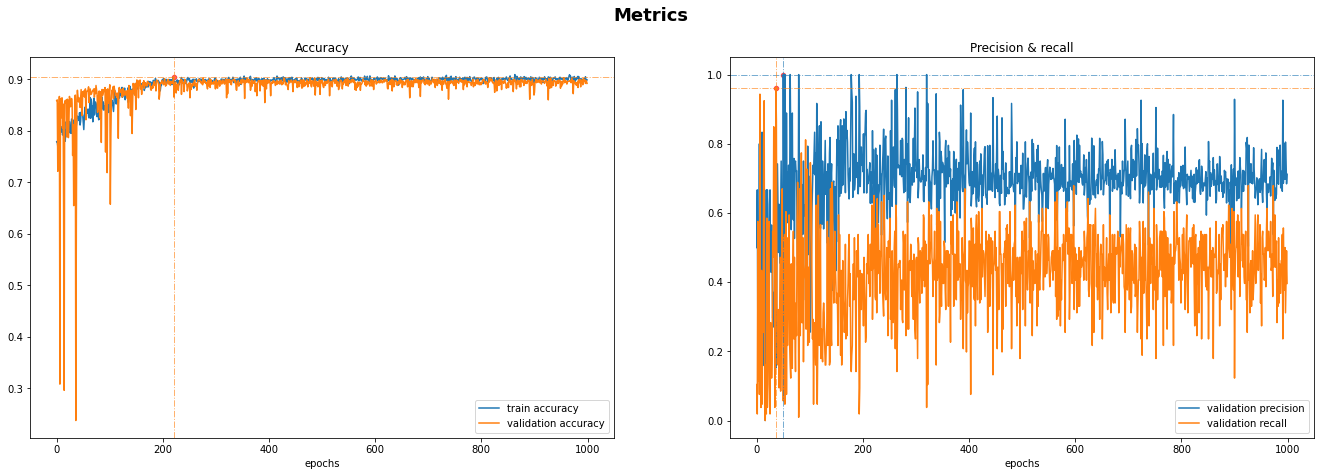

In [11]:
plot_learning_curves_opt(history)

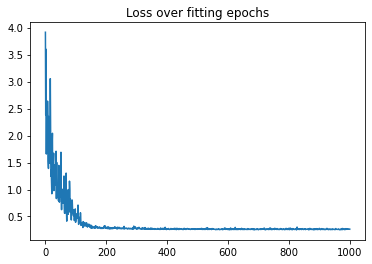

Min loss: 0.2510460913181305


In [12]:
plot_learning_loss(history)

In [13]:
print('Max validation accuracy:', max(history.history['val_accuracy']))
print('Max validation precision:', max(history.history['val_precision']))
print('Max validation recall:', max(history.history['val_recall']))

Max validation accuracy: 0.9039999842643738
Max validation precision: 1.0
Max validation recall: 0.9622641801834106


In [14]:
y_pred = model.predict(x_test)
#y_pred

In [15]:
import numpy as np

threshold = 0.5
y_pred = np.where(y_pred<=threshold, 0, 1)



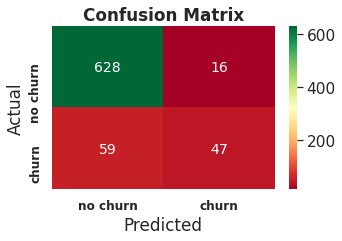


Classification report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       644
           1       0.75      0.44      0.56       106

    accuracy                           0.90       750
   macro avg       0.83      0.71      0.75       750
weighted avg       0.89      0.90      0.89       750



In [16]:
plot_confusion_matrix(y_test, y_pred, cmap='RdYlGn', normalize=None)
print_classification_report(y_test, y_pred)

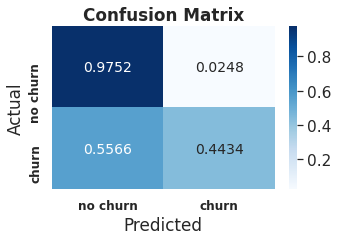

In [17]:
plot_confusion_matrix(y_test, y_pred, cmap='Blues')

In [18]:
print_classification_report(y_test, y_pred)


Classification report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       644
           1       0.75      0.44      0.56       106

    accuracy                           0.90       750
   macro avg       0.83      0.71      0.75       750
weighted avg       0.89      0.90      0.89       750



   ## Check other training data

=== Using data: original ===
Max validation accuracy: 0.8933333158493042
Max validation precision: 0.8095238208770752
Max validation recall: 0.9150943160057068
24/24 [==============================] - 0s 1ms/step - loss: 0.5074 - accuracy: 0.8760 - precision: 0.5844 - recall: 0.4245


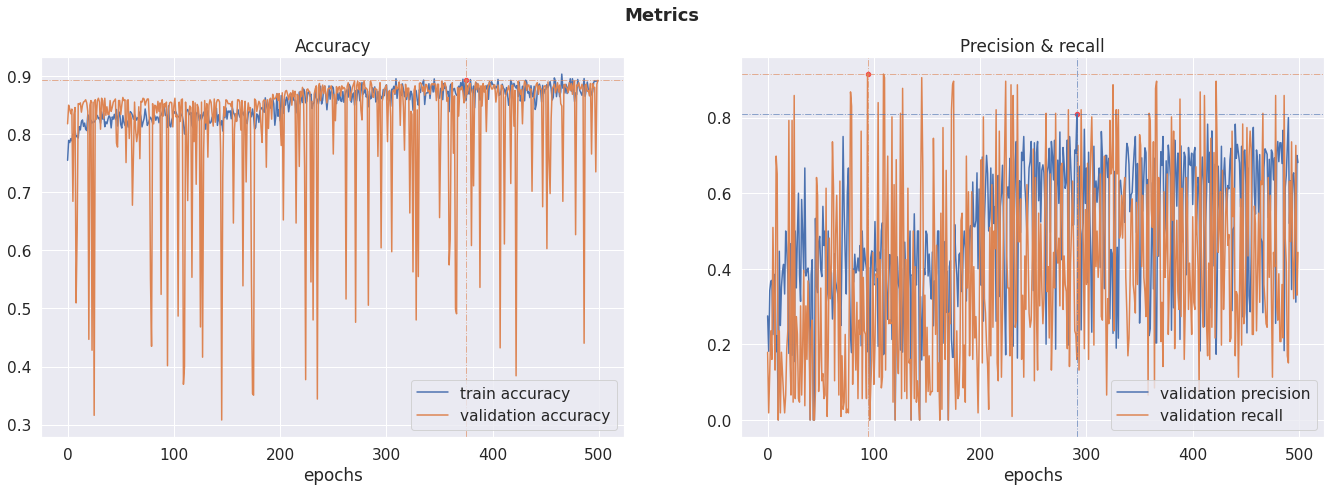

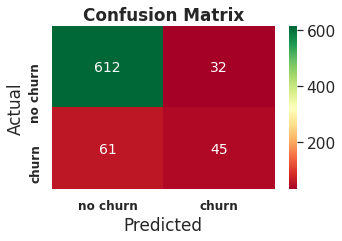



=== Using data: dropped ===
Max validation accuracy: 0.8960000276565552
Max validation precision: 1.0
Max validation recall: 0.9245283007621765
24/24 [==============================] - 0s 1ms/step - loss: 0.3279 - accuracy: 0.8827 - precision: 0.5918 - recall: 0.5472


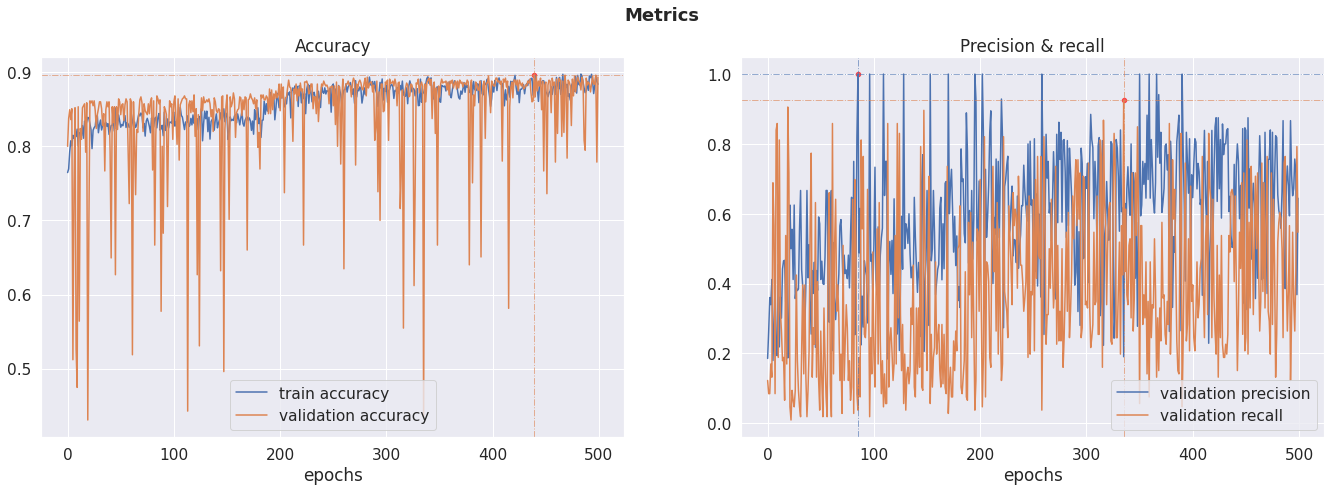

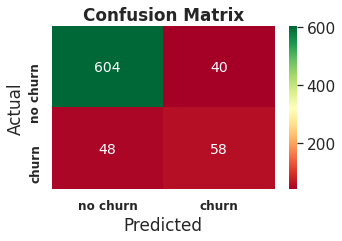



=== Using data: scaled ===
Max validation accuracy: 0.8960000276565552
Max validation precision: 1.0
Max validation recall: 0.9905660152435303
24/24 [==============================] - 0s 1ms/step - loss: 0.4237 - accuracy: 0.8747 - precision: 0.5588 - recall: 0.5377


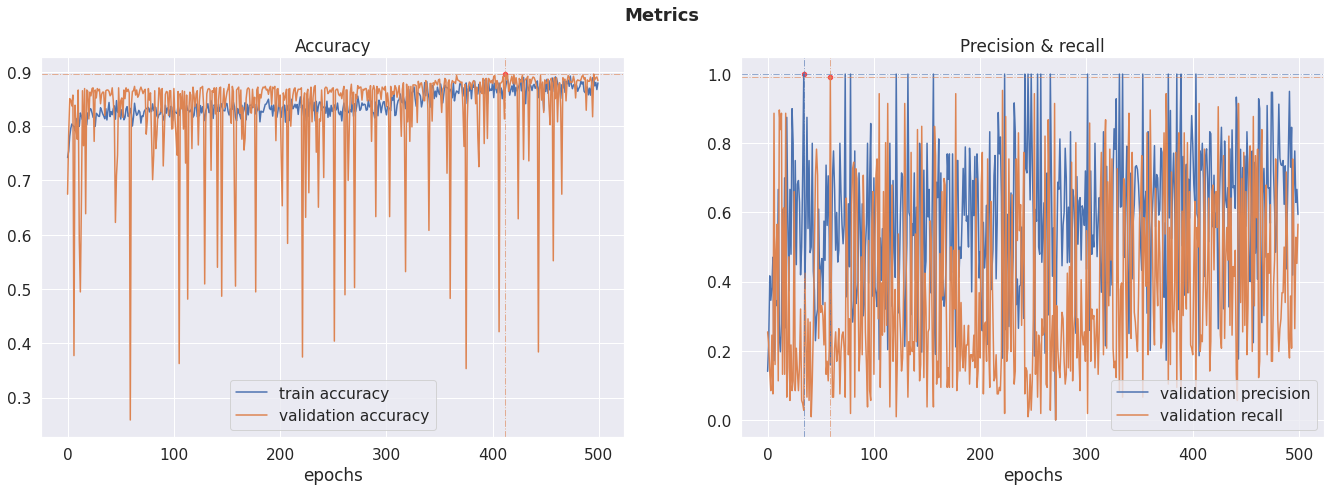

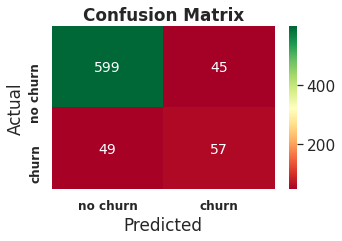



=== Using data: encoded ===
Max validation accuracy: 0.890666663646698
Max validation precision: 1.0
Max validation recall: 0.9339622855186462
24/24 [==============================] - 0s 1ms/step - loss: 0.8585 - accuracy: 0.8747 - precision: 0.7000 - recall: 0.1981


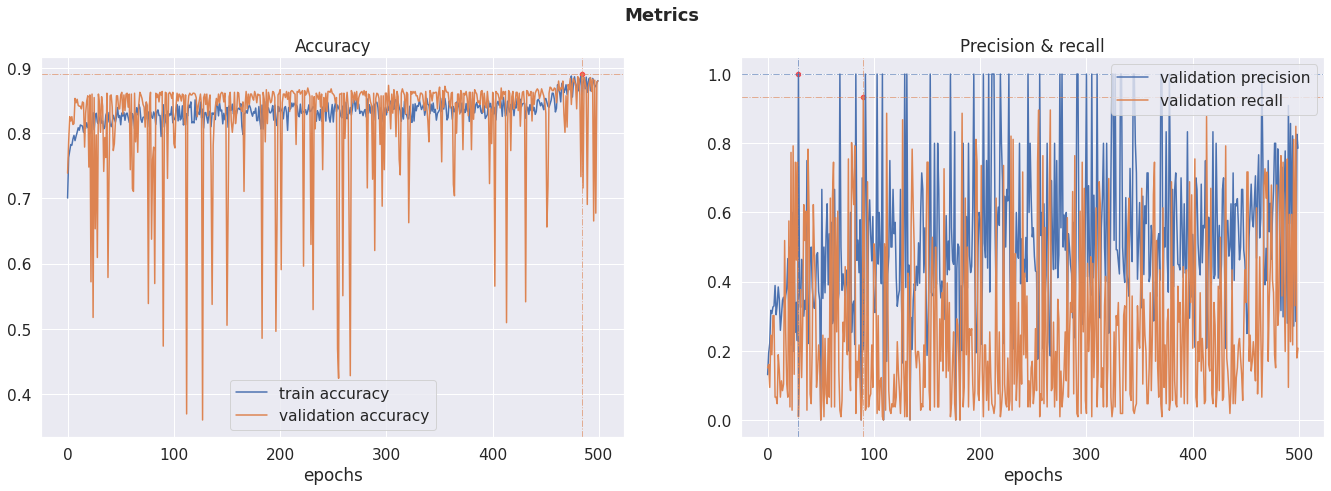

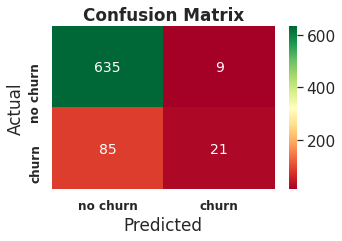



=== Using data: encoded and scaled ===
Max validation accuracy: 0.9026666879653931
Max validation precision: 1.0
Max validation recall: 0.9433962106704712
24/24 [==============================] - 0s 1ms/step - loss: 0.3391 - accuracy: 0.8987 - precision: 0.6829 - recall: 0.5283


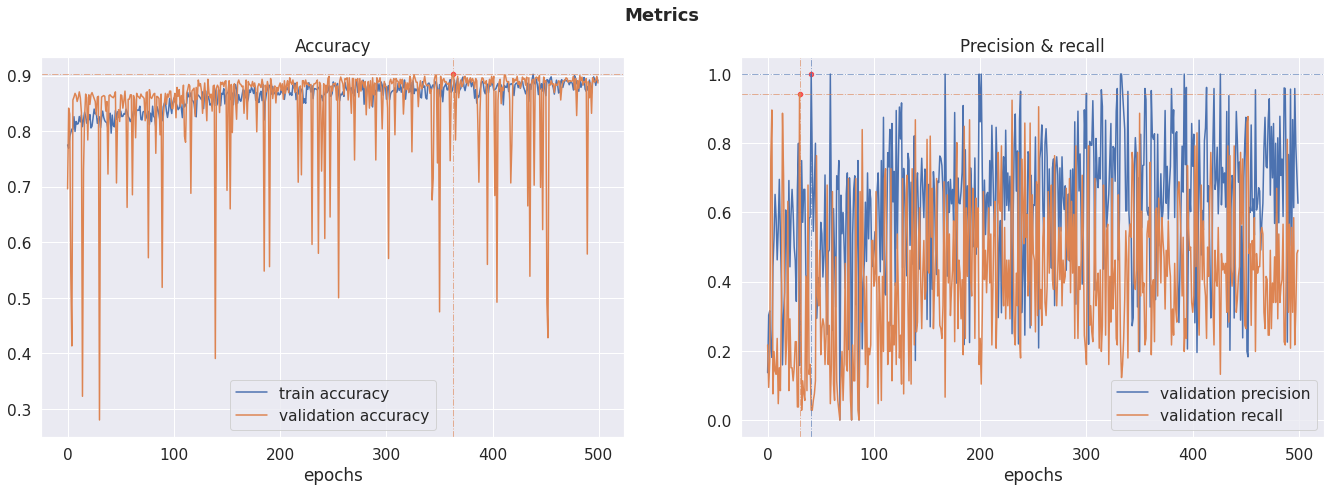

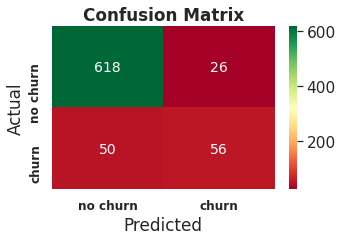



=== Using data: scaled and dropped ===
Max validation accuracy: 0.9013333320617676
Max validation precision: 1.0
Max validation recall: 0.9433962106704712
24/24 [==============================] - 0s 1ms/step - loss: 0.3597 - accuracy: 0.8987 - precision: 0.6829 - recall: 0.5283


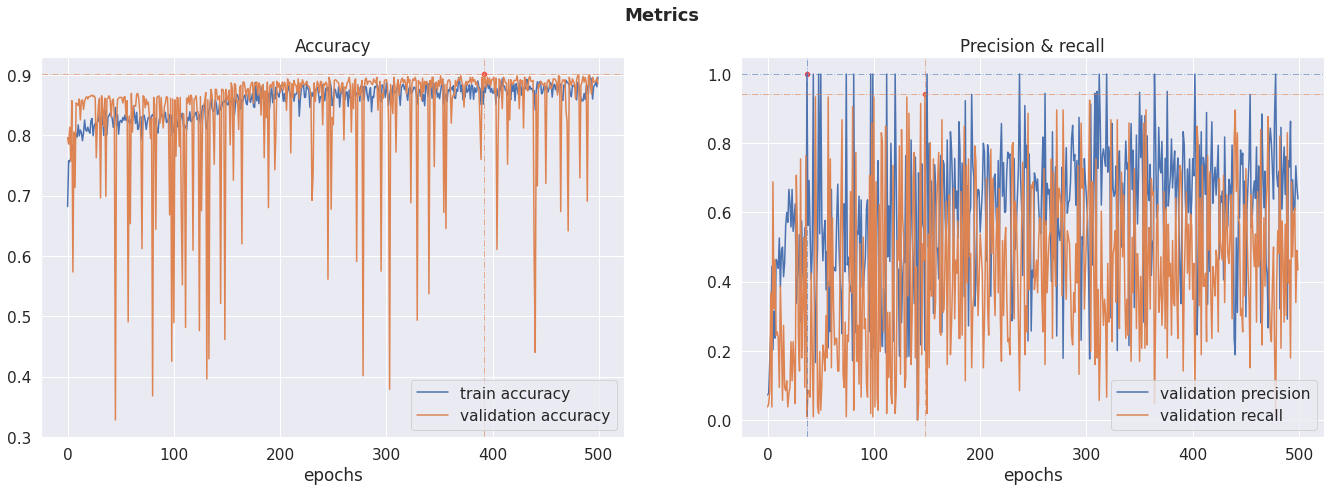

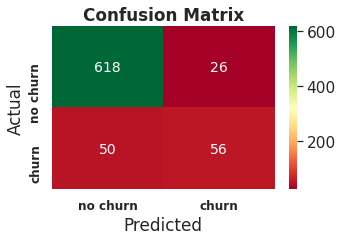

In [20]:
epo = 500

for input in list(data_dict.keys()):
    print('=== Using data:', input, '===')
    x_train, x_test, x_val, y_train, y_test, y_val = get_bulk_inst(data_dict, key)
    
    chk_model = build_model(input_shape=20, hidden_shapes=[32], hidden_activation='relu',
                    opt='adam', dropout=0.0, loss='binary_crossentropy')
    
    history = chk_model.fit(x_train, y_train, epochs=epo, validation_data=(x_val, y_val), verbose=0)
    print('Max validation accuracy:', max(history.history['val_accuracy']))
    print('Max validation precision:', max(history.history['val_precision']))
    print('Max validation recall:', max(history.history['val_recall']))
    y_pred = chk_model.predict(x_test)
    y_pred = np.where(y_pred<=threshold, 0, 1)
    chk_model.evaluate(x_test, y_test)
    plot_learning_curves_opt(history)
    plot_confusion_matrix(y_test, y_pred, cmap='RdYlGn', normalize=None)
    print('\n')
    

 ## Results of simple model - sigmoid as hiden activation

In [32]:
model = build_model(input_shape=20, hidden_shapes=[32], hidden_activation='sigmoid',
                    opt=optimizer, dropout=0.0, loss='binary_crossentropy')

In [33]:
model.summary()

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 20)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 32)                672       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [34]:
epo = 1000

history = model.fit(x_train, y_train, epochs=epo, validation_data=(x_val, y_val), verbose=1)

Epoch 1/1000
110/110 [==============================] - 0s 4ms/step - loss: 0.4314 - accuracy: 0.8457 - precision: 0.1311 - recall: 0.0133 - val_loss: 0.4185 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4075 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4077 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4074 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/1000
110/110 [==================

Epoch 35/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4092 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 36/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4078 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 37/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4086 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 38/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4082 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 39/1000
110/110 [=====

Epoch 69/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4076 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 70/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4076 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 71/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4082 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 72/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4076 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 73/1000
110/110 [=====

Epoch 103/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4077 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 104/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4075 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 105/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4077 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 106/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4119 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 107/1000
110/110 [

110/110 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4077 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 137/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4079 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 138/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4074 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 139/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4079 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 140/1000
110/110 [===============

Epoch 170/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4082 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 171/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4086 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 172/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4101 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 173/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4092 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 174/1000
110/110 [

110/110 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4075 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 204/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4081 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 205/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4074 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 206/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4074 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 207/1000
110/110 [===============

Epoch 237/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4090 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 238/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4075 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 239/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4101 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 240/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4080 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 241/1000
110/110 [

110/110 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4077 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 271/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4090 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 272/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4086 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 273/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4087 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 274/1000
110/110 [===============

Epoch 304/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4084 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 305/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4108 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 306/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4084 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 307/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4077 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 308/1000
110/110 [

110/110 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4119 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 338/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4075 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 339/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4084 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 340/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4109 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 341/1000
110/110 [===============

Epoch 371/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4105 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 372/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4077 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 373/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4077 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 374/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4074 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 375/1000
110/110 [

110/110 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4105 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 405/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4092 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 406/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4074 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 407/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4079 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 408/1000
110/110 [===============

Epoch 438/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4074 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 439/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4075 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 440/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4075 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 441/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4074 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 442/1000
110/110 [

110/110 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4108 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 472/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4082 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 473/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4094 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 474/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4090 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 475/1000
110/110 [===============

Epoch 505/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4093 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 506/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4097 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 507/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4085 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 508/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4110 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 509/1000
110/110 [

110/110 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4077 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 539/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4084 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 540/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4091 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 541/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4092 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 542/1000
110/110 [===============

Epoch 572/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4076 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 573/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4102 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 574/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4076 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 575/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4075 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 576/1000
110/110 [

110/110 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4078 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 606/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4081 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 607/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4077 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 608/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4077 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 609/1000
110/110 [===============

Epoch 639/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4082 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 640/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4091 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 641/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4078 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 642/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4115 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 643/1000
110/110 [

110/110 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4096 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 673/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4074 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 674/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4074 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 675/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4076 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 676/1000
110/110 [===============

Epoch 706/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4082 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 707/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4086 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 708/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4076 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 709/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4087 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 710/1000
110/110 [

110/110 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4075 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 740/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4085 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 741/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4089 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 742/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4077 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 743/1000
110/110 [===============

Epoch 773/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4098 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 774/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4106 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 775/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4168 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 776/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4075 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 777/1000
110/110 [

110/110 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4086 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 807/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4075 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 808/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4106 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 809/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4079 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 810/1000
110/110 [===============

Epoch 840/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4074 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 841/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4088 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 842/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4075 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 843/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4090 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 844/1000
110/110 [

110/110 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4080 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 874/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4075 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 875/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4078 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 876/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4098 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 877/1000
110/110 [===============

Epoch 907/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4074 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 908/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4092 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 909/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4076 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 910/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4076 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 911/1000
110/110 [

110/110 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4081 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 941/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4122 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 942/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4075 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 943/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4075 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 944/1000
110/110 [===============

Epoch 974/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4082 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 975/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4084 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 976/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4079 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 977/1000
110/110 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8586 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4080 - val_accuracy: 0.8587 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 978/1000
110/110 [

In [35]:
model.evaluate(x_test, y_test)

24/24 [==============================] - 0s 1ms/step - loss: 0.4074 - accuracy: 0.8587 - precision: 0.0000e+00 - recall: 0.0000e+00


[0.407430499792099, 0.8586666584014893, 0.0, 0.0]

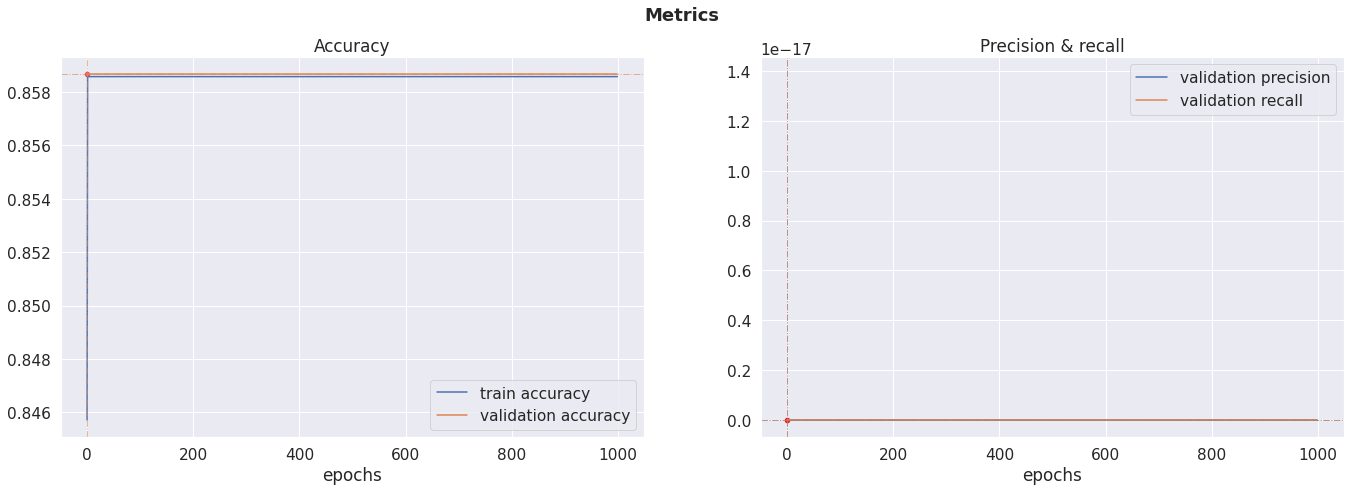

In [36]:
plot_learning_curves_opt(history)

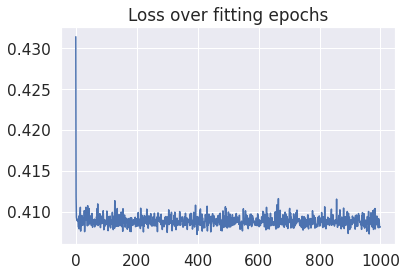

Min loss: 0.4072204530239105


In [37]:
plot_learning_loss(history)

In [38]:
print('Max validation accuracy:', max(history.history['val_accuracy']))
print('Max validation precision:', max(history.history['val_precision']))
print('Max validation recall:', max(history.history['val_recall']))

Max validation accuracy: 0.8586666584014893
Max validation precision: 0.0
Max validation recall: 0.0


In [39]:
import numpy as np

threshold = 0.5

y_pred = model.predict(x_test)
y_pred = np.where(y_pred<=threshold, 0, 1)

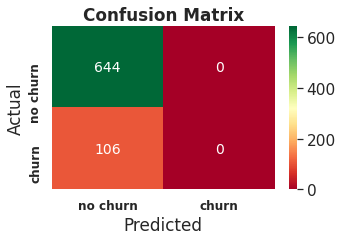


Classification report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       644
           1       0.00      0.00      0.00       106

    accuracy                           0.86       750
   macro avg       0.43      0.50      0.46       750
weighted avg       0.74      0.86      0.79       750



/home/tobias/anaconda3/envs/tobias/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
plot_confusion_matrix(y_test, y_pred, cmap='RdYlGn', normalize=None)
print_classification_report(y_test, y_pred)

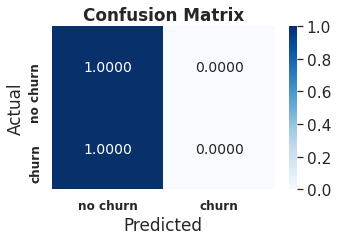

In [41]:
plot_confusion_matrix(y_test, y_pred, cmap='Blues')

In [42]:
print_classification_report(y_test, y_pred)


Classification report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       644
           1       0.00      0.00      0.00       106

    accuracy                           0.86       750
   macro avg       0.43      0.50      0.46       750
weighted avg       0.74      0.86      0.79       750



/home/tobias/anaconda3/envs/tobias/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
